### EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar el archivo CSV
df_calls = pd.read_csv("../data/raw/megaline_calls.csv")
df_internet = pd.read_csv("../data/raw/megaline_internet.csv")
df_messages = pd.read_csv("../data/raw/megaline_messages.csv")
df_plans = pd.read_csv("../data/raw/megaline_plans.csv")
df_users = pd.read_csv("../data/raw/megaline_users.csv")

## Calidad de los datos

In [35]:
# Shape de los dataframes
print("Calls: ", df_calls.shape)
print("Internet: ", df_internet.shape)
print("Messages: ", df_messages.shape)
print("Plans: ", df_plans.shape)
print("Users: ", df_users.shape)

Calls:  (137735, 5)
Internet:  (104825, 5)
Messages:  (76051, 4)
Plans:  (2, 8)
Users:  (500, 8)


In [3]:
# Columnas de los DataFrames
print("Calls")
print(df_calls.columns)
print("Internet")
print(df_internet.columns)
print("Messages")
print(df_messages.columns)
print("Plans")
print(df_plans.columns)
print("Users")
print(df_users.columns)

Calls
Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')
Internet
Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')
Messages
Index(['id', 'user_id', 'message_date'], dtype='object')
Plans
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')
Users
Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')


In [4]:
# Mostrar las primeras filas de cada archivo
print(df_calls.head())
print(df_internet.head())
print(df_messages.head())
print(df_plans.head())
print(df_users.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0       

In [5]:
# Info
print("Calls")
print(df_calls.info())
print("Internet")
print(df_internet.info())
print("Messages")
print(df_messages.info())
print("Plans")
print(df_plans.info())
print("Users")
print(df_users.info())



Calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
Internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
Messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #  

In [6]:
# Pasar Dates a datetime
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"])
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"])
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"])
df_users["churn_date"] = pd.to_datetime(df_users["churn_date"])

In [7]:
# Descripción
print("Calls")
print(df_calls.describe())
print("Internet")
print(df_internet.describe())
print("Messages")
print(df_messages.describe())
print("Plans")
print(df_plans.describe())
print("Users")
print(df_users.describe())

Calls
             user_id                      call_date       duration
count  137735.000000                         137735  137735.000000
mean     1247.658046  2018-09-25 19:57:56.319018496       6.745927
min      1000.000000            2018-01-15 00:00:00       0.000000
25%      1128.000000            2018-08-08 00:00:00       1.290000
50%      1247.000000            2018-10-12 00:00:00       5.980000
75%      1365.000000            2018-11-26 00:00:00      10.690000
max      1499.000000            2018-12-31 00:00:00      37.600000
std       139.416268                            NaN       5.839241
Internet
             user_id                   session_date        mb_used
count  104825.000000                         104825  104825.000000
mean     1242.496361  2018-09-26 11:37:55.048890880     366.713701
min      1000.000000            2018-01-15 00:00:00       0.000000
25%      1122.000000            2018-08-11 00:00:00     136.080000
50%      1236.000000            2018-10-13 00:0

In [8]:
# Valores Unicos Calls
print(df_calls['duration'].unique())
print(df_calls['call_date'].unique())

[ 8.52 13.66 14.48 ... 27.53 22.57 25.18]
<DatetimeArray>
['2018-12-27 00:00:00', '2018-12-28 00:00:00', '2018-12-30 00:00:00',
 '2018-12-31 00:00:00', '2018-12-26 00:00:00', '2018-12-29 00:00:00',
 '2018-09-06 00:00:00', '2018-10-12 00:00:00', '2018-10-17 00:00:00',
 '2018-12-05 00:00:00',
 ...
 '2018-02-26 00:00:00', '2018-02-10 00:00:00', '2018-02-19 00:00:00',
 '2018-02-18 00:00:00', '2018-02-21 00:00:00', '2018-01-24 00:00:00',
 '2018-02-20 00:00:00', '2018-02-28 00:00:00', '2018-01-26 00:00:00',
 '2018-01-21 00:00:00']
Length: 351, dtype: datetime64[ns]


In [9]:
# Valores Unicos Internet
print(df_internet['mb_used'].unique())
print(df_internet['session_date'].unique())


[ 89.86   0.   660.4  ... 753.43 304.72 758.31]
<DatetimeArray>
['2018-12-29 00:00:00', '2018-12-31 00:00:00', '2018-12-28 00:00:00',
 '2018-12-26 00:00:00', '2018-12-27 00:00:00', '2018-08-24 00:00:00',
 '2018-12-09 00:00:00', '2018-11-04 00:00:00', '2018-11-27 00:00:00',
 '2018-12-13 00:00:00',
 ...
 '2018-02-17 00:00:00', '2018-01-23 00:00:00', '2018-02-10 00:00:00',
 '2018-02-15 00:00:00', '2018-02-14 00:00:00', '2018-02-08 00:00:00',
 '2018-02-09 00:00:00', '2018-01-28 00:00:00', '2018-02-21 00:00:00',
 '2018-01-18 00:00:00']
Length: 351, dtype: datetime64[ns]


In [10]:
# Valores Unicos Messages
print(df_messages['message_date'].unique())

<DatetimeArray>
['2018-12-27 00:00:00', '2018-12-31 00:00:00', '2018-12-26 00:00:00',
 '2018-12-29 00:00:00', '2018-12-30 00:00:00', '2018-12-28 00:00:00',
 '2018-12-25 00:00:00', '2018-11-14 00:00:00', '2018-08-17 00:00:00',
 '2018-12-05 00:00:00',
 ...
 '2018-01-30 00:00:00', '2018-01-31 00:00:00', '2018-02-12 00:00:00',
 '2018-02-07 00:00:00', '2018-02-06 00:00:00', '2018-02-14 00:00:00',
 '2018-02-18 00:00:00', '2018-01-19 00:00:00', '2018-01-29 00:00:00',
 '2018-01-24 00:00:00']
Length: 351, dtype: datetime64[ns]


In [11]:
# Valores Unicos Plans
print(df_plans['messages_included'].unique())
print(df_plans['mb_per_month_included'].unique())
print(df_plans['minutes_included'].unique())
print(df_plans['usd_monthly_pay'].unique())
print(df_plans['usd_per_gb'].unique())
print(df_plans['usd_per_message'].unique())
print(df_plans['usd_per_minute'].unique())
print(df_plans['plan_name'].unique())

[  50 1000]
[15360 30720]
[ 500 3000]
[20 70]
[10  7]
[0.03 0.01]
[0.03 0.01]
['surf' 'ultimate']


In [12]:
# Valores Unicos Users
print(df_users['city'].unique())
print(df_users['reg_date'].unique())
print(df_users['plan'].unique())
print(df_users['churn_date'].unique())


['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN M

## Visualizaciones básicas

In [13]:
# Costo total 
df_calls['cost'] = df_calls['duration'] * df_plans['usd_per_minute']
df_internet['cost'] = df_internet['mb_used'] * (df_plans['usd_per_gb']/1000)
df_messages['cost'] = df_plans['usd_per_message']

In [24]:
print("Calls")
df_calls['cost']
print("Internet")
df_internet['cost']
print("Messages")
df_messages['cost']

Calls
Internet
Messages


0        0.03
1        0.01
2         NaN
3         NaN
4         NaN
         ... 
76046     NaN
76047     NaN
76048     NaN
76049     NaN
76050     NaN
Name: cost, Length: 76051, dtype: float64

# Calls

<Axes: >

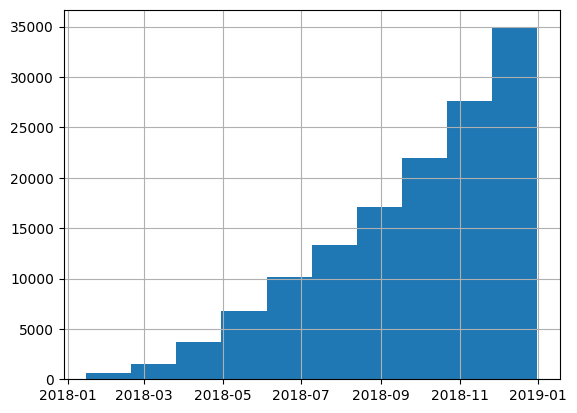

In [36]:
# Histograma Call_Date
df_calls['call_date'].hist()

<Axes: >

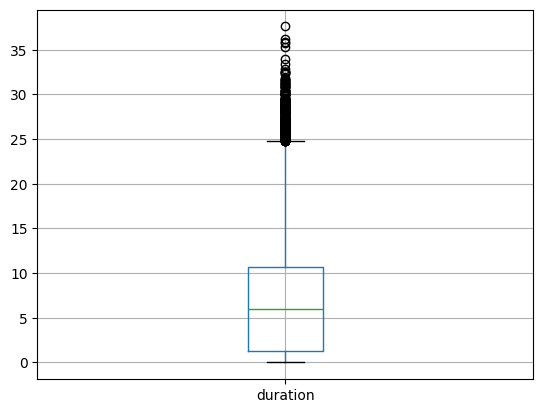

In [29]:
# Boxplot Call_Date
df_calls.boxplot(column='duration')

<Axes: >

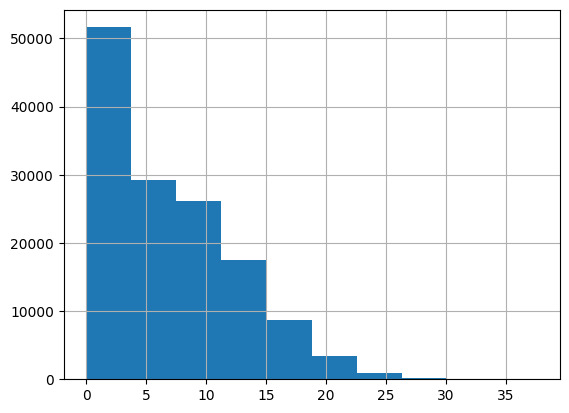

In [30]:
# Histograma Call_Date
df_calls['duration'].hist()

# Internet

<Axes: >

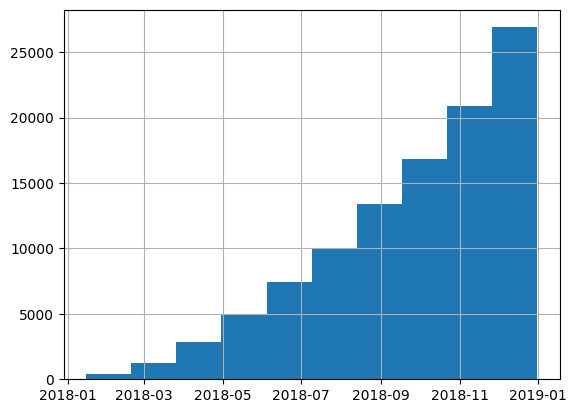

In [16]:
# Histograma Session_Date
df_internet['session_date'].hist()

<Axes: >

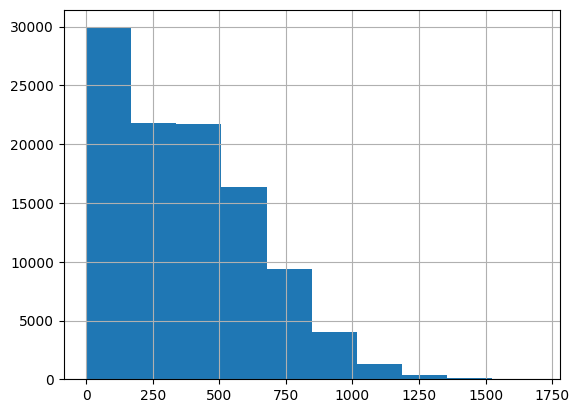

In [32]:
# Histograma MB_Used
df_internet['mb_used'].hist()


<Axes: >

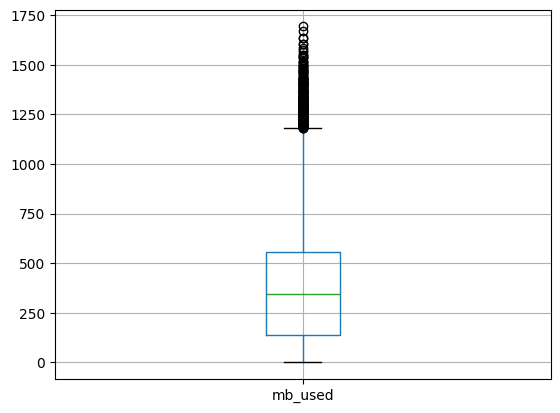

In [33]:
# Boxplot MB_Used
df_internet.boxplot(column='mb_used')

# Messages

<Axes: >

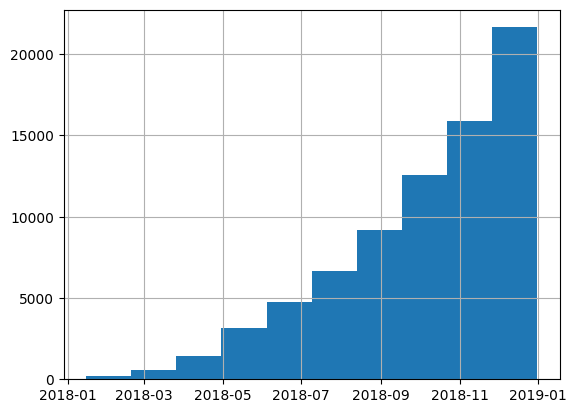

In [18]:
# Histograma Message_Date
df_messages['message_date'].hist()

# Users

<Axes: >

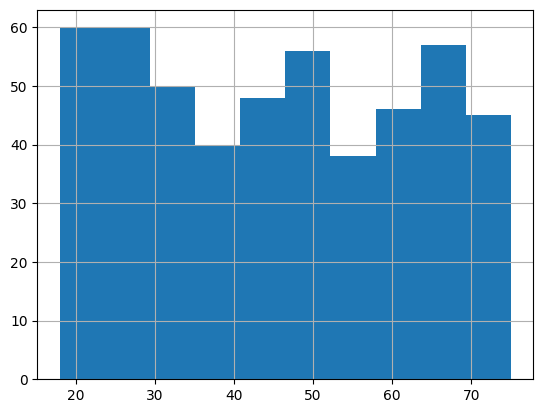

In [19]:
# Histograma age
df_users['age'].hist()

<Axes: >

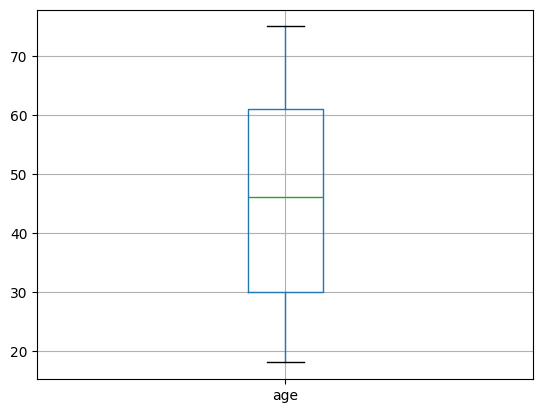

In [34]:
# Boxplot age
df_users.boxplot(column='age')

<Axes: >

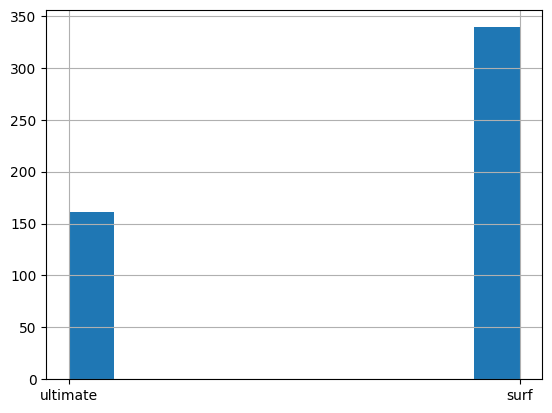

In [20]:
# Histograma plan
df_users['plan'].hist()

<Axes: >

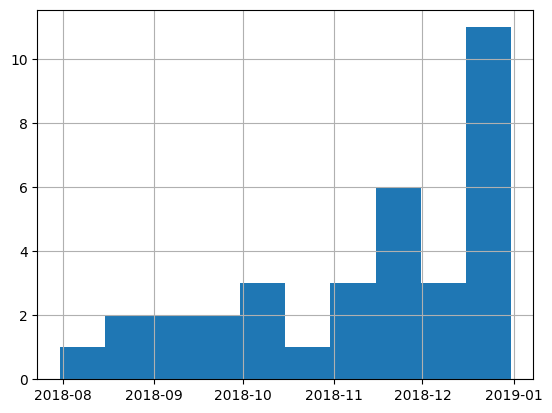

In [21]:
# Histograma churn_date
df_users['churn_date'].hist()